# Mechanisms of Action Prediction

### Imports

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

### Reading data:

In [2]:
train_features = pd.read_csv("train_features.csv")
test_features = pd.read_csv("test_features.csv")
train_targets_scored = pd.read_csv("train_targets_scored.csv")

## EDA

Features:<br>
Features <strong>g-</strong> signify gene expression data<br>
Features <strong>c-</strong> signify cell viability data<br>
<strong>cp_type</strong> indicates samples treated with a compound (cp_vehicle) or with a control perturbation (ctrl_vehicle)<br>
<strong>cp_time</strong> indicates treatment duration (24, 48, 72 hours)<br>
<strong>cp_dose</strong> indicates treatment dose (high or low)<br>

#### Train features

In [3]:
train_features.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [4]:
train_features.describe()

,cp_time,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,...,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,...,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,...,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,48.000000,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,...,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,72.000000,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,...,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,72.000000,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


#### Test features

In [7]:
test_features.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_0004d9e33,trt_cp,24,D1,-0.5458,0.1306,-0.5135,0.4408,1.5500,-0.1644,...,0.0981,0.7978,-0.1430,-0.2067,-0.2303,-0.1193,0.0210,-0.0502,0.1510,-0.7750
1,id_001897cda,trt_cp,72,D1,-0.1829,0.2320,1.2080,-0.4522,-0.3652,-0.3319,...,-0.1190,-0.1852,-1.0310,-1.3670,-0.3690,-0.5382,0.0359,-0.4764,-1.3810,-0.7300
2,id_002429b5b,ctl_vehicle,24,D1,0.1852,-0.1404,-0.3911,0.1310,-1.4380,0.2455,...,-0.2261,0.3370,-1.3840,0.8604,-1.9530,-1.0140,0.8662,1.0160,0.4924,-0.1942
3,id_00276f245,trt_cp,24,D2,0.4828,0.1955,0.3825,0.4244,-0.5855,-1.2020,...,0.1260,0.1570,-0.1784,-1.1200,-0.4325,-0.9005,0.8131,-0.1305,0.5645,-0.5809
4,id_0027f1083,trt_cp,48,D1,-0.3979,-1.2680,1.9130,0.2057,-0.5864,-0.0166,...,0.4965,0.7578,-0.1580,1.0510,0.5742,1.0900,-0.2962,-0.5313,0.9931,1.8380


In [8]:
test_features.describe()

,cp_time,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,...,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000
mean,48.030136,0.197471,-0.063233,0.137516,0.049622,0.052434,-0.147852,0.010424,-0.166886,-0.168069,...,-0.429980,-0.413215,-0.475762,-0.462484,-0.479196,-0.346450,-0.423905,-0.316387,-0.404859,-0.269792
std,19.414155,1.373476,0.800573,1.066475,0.949972,0.994018,1.204934,0.859452,1.088335,1.666240,...,2.013142,1.995433,1.963440,2.128477,2.149705,1.645669,2.086895,1.655524,1.790883,1.355936
min,24.000000,-5.321000,-4.142000,-6.996000,-3.765000,-6.312000,-8.717000,-6.037000,-8.833000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.502725,-0.552975,-0.431800,-0.465350,-0.445750,-0.576000,-0.521325,-0.477400,-0.526925,...,-0.527725,-0.521850,-0.539375,-0.540450,-0.548175,-0.561525,-0.497050,-0.521125,-0.531075,-0.541950
50%,48.000000,-0.060700,-0.027500,0.073400,-0.036450,-0.047800,-0.012500,-0.009200,0.002150,-0.002900,...,0.010050,0.010900,0.006550,0.017500,0.013450,-0.020000,0.043800,0.020450,0.030750,-0.006250
75%,72.000000,0.454650,0.429950,0.641125,0.423150,0.436050,0.498950,0.495975,0.422500,0.518050,...,0.478900,0.479625,0.442550,0.473300,0.487825,0.454400,0.501050,0.478925,0.487000,0.422800
max,72.000000,10.000000,4.536000,8.227000,10.000000,7.615000,6.356000,6.190000,2.995000,8.007000,...,4.936000,5.300000,3.268000,4.087000,5.290000,5.053000,5.276000,3.074000,3.859000,4.149000


#### Check for missing values

In [12]:
print(train_features.isnull().any().any())
print(test_features.isnull().any().any())

False
False


### Features

#### Categorical features

Text(0.5, 1.0, 'cp_time on train set')

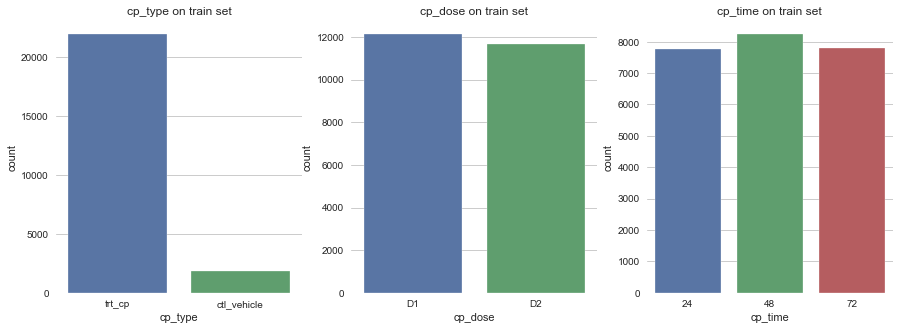

In [16]:
plt.style.use("seaborn")
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(x='cp_type', data=train_features)
plt.title("cp_type on train set")

plt.subplot(1,3,2)
sns.countplot(x='cp_dose', data=train_features)
plt.title("cp_dose on train set")

plt.subplot(1,3,3)
sns.countplot(x='cp_time', data=train_features)
plt.title("cp_time on train set")

#### Numeric features

## Data preparation

## Modelling

## Evaluation